# small convnet from scratch

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Nadam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# dimensions of our images.
img_width, img_height = 299, 299

In [4]:
train_data_dir = 'data/train'
validation_data_dir = 'data/valid'
nb_train_samples = 1037
nb_validation_samples = 444
nb_classes = 3  # number of classes
epochs = 100
batch_size = 16

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

In [7]:
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 297, 297, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 146, 146, 32)      0         
__________

In [9]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)

In [10]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
class_mode='categorical')

Found 1037 images belonging to 3 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
class_mode='categorical')

Found 444 images belonging to 3 classes.


In [13]:
# See: https://github.com/fchollet/keras/issues/5475
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
print("\nTraining\n")
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size,
callbacks=callbacks_list)
print('Finished training')


Training

Epoch 1/100
64/64 [==============================] - 224s - loss: 3.9160 - acc: 0.2725 - val_loss: 2.6505 - val_acc: 0.1690
Epoch 2/100
64/64 [==============================] - 209s - loss: 2.8507 - acc: 0.1889 - val_loss: 2.2668 - val_acc: 0.1667
Epoch 3/100
64/64 [==============================] - 202s - loss: 2.0545 - acc: 0.1819 - val_loss: 1.7902 - val_acc: 0.1644
Epoch 4/100
64/64 [==============================] - 198s - loss: 1.7984 - acc: 0.1903 - val_loss: 1.7378 - val_acc: 0.1690
Epoch 5/100
64/64 [==============================] - 208s - loss: 1.7058 - acc: 0.2070 - val_loss: 1.6167 - val_acc: 0.4144
Epoch 6/100
64/64 [==============================] - 209s - loss: 2.0785 - acc: 0.2599 - val_loss: 1.8475 - val_acc: 0.1690
Epoch 7/100
64/64 [==============================] - 205s - loss: 1.8013 - acc: 0.2079 - val_loss: 2.1075 - val_acc: 0.1667
Epoch 8/100
64/64 [==============================] - 196s - loss: 2.1114 - acc: 0.1979 - val_loss: 1.4934 - val_acc: 0.16

64/64 [==============================] - 195s - loss: 1.0044 - acc: 0.5240 - val_loss: 0.9948 - val_acc: 0.5394
Epoch 68/100
64/64 [==============================] - 194s - loss: 1.0087 - acc: 0.5176 - val_loss: 0.9947 - val_acc: 0.5394
Epoch 69/100
64/64 [==============================] - 194s - loss: 1.0036 - acc: 0.5255 - val_loss: 0.9932 - val_acc: 0.5394
Epoch 70/100
64/64 [==============================] - 194s - loss: 1.0055 - acc: 0.5236 - val_loss: 0.9982 - val_acc: 0.5347
Epoch 71/100
64/64 [==============================] - 194s - loss: 1.0036 - acc: 0.5252 - val_loss: 0.9995 - val_acc: 0.5347
Epoch 72/100
64/64 [==============================] - 194s - loss: 1.0128 - acc: 0.5097 - val_loss: 1.0006 - val_acc: 0.5324
Epoch 73/100
64/64 [==============================] - 194s - loss: 1.0014 - acc: 0.5270 - val_loss: 0.9991 - val_acc: 0.5324
Epoch 74/100
64/64 [==============================] - 194s - loss: 1.0094 - acc: 0.5145 - val_loss: 0.9954 - val_acc: 0.5394
Epoch 75/100


In [16]:
model.save_weights('third_try.h5')

In [17]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


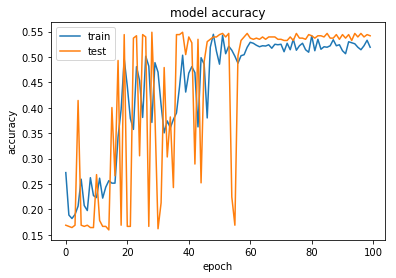

In [19]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

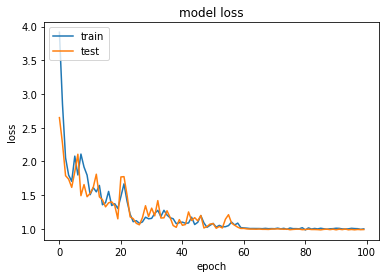

In [20]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()